In [9]:
import numpy as np
import pandas as pd

#Visualisation
import matplotlib.pyplot as plt
import missingno
import seaborn as sns

In [44]:
#load the dataset
df = pd.read_csv("Autism_Data.arff")
df = df.replace('?', np.nan)

In [47]:
#column name spell check/ fixes 
df = df.rename(columns = {"A1_Score":"A1","A2_Score":"A2", 'A3_Score':'A3', 'A4_Score':'A4', 'A5_Score':'A5', 'A6_Score':'A6', 'A7_Score':'A7', 'A8_Score':'A8', 'A9_Score':'A9', 'A10_Score':'A10', "jundice":"jaundice", "austim":"autism", "contry_of_res": "country", "Class/ASD":"asd_classification"})

<AxesSubplot:>

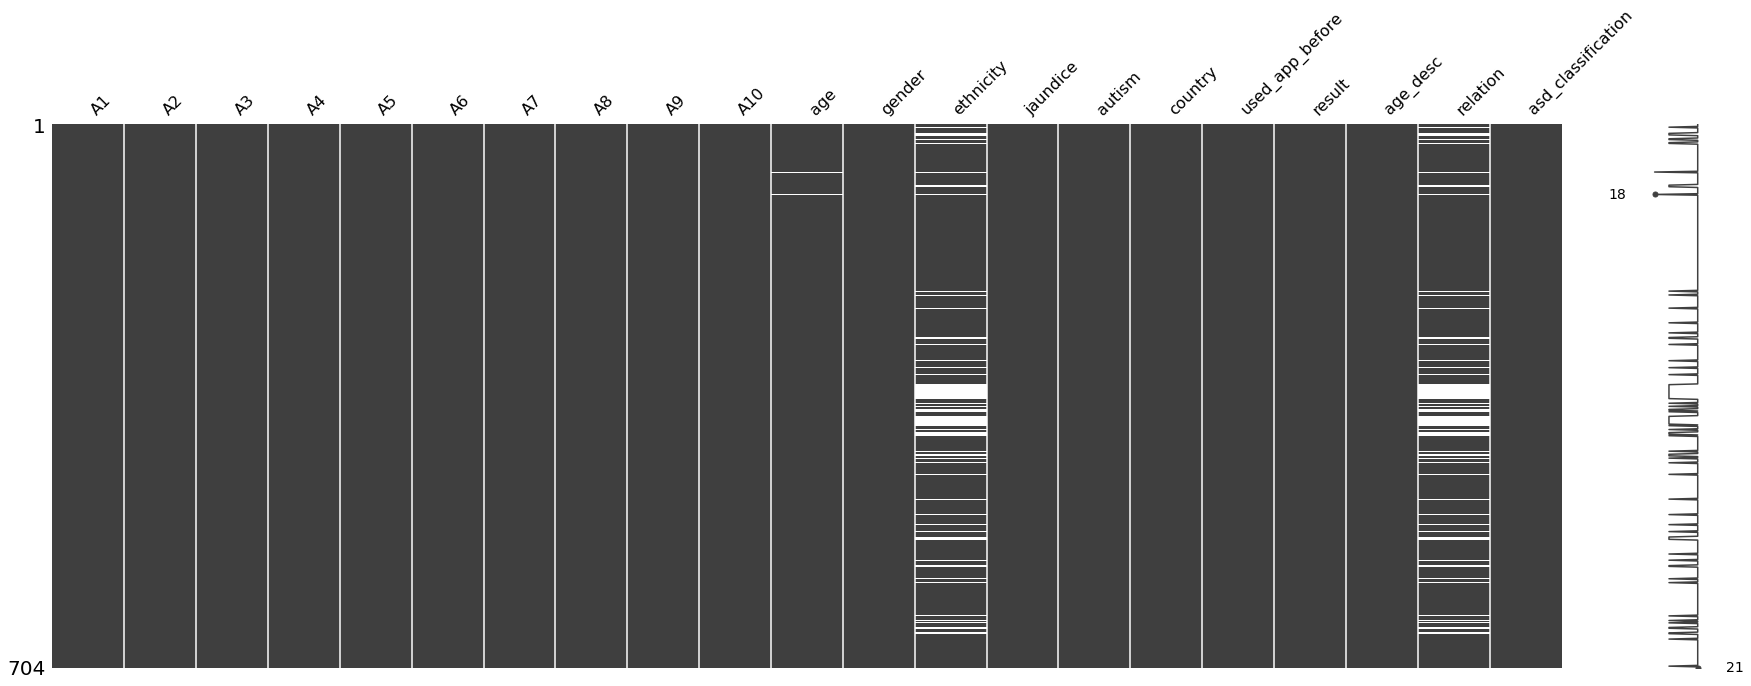

In [48]:
#Check for missing data
missingno.matrix(df, figsize =(30,10))

In [13]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,gender,ethnicity,jaundice,autism,country,used_app_before,result,age_desc,relation,asd_classification
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2,'18 and more',NaN,NO


In [135]:
df.dtypes

A1                     int64
A2                     int64
A3                     int64
A4                     int64
A5                     int64
A6                     int64
A7                     int64
A8                     int64
A9                     int64
A10                    int64
age                   object
gender                object
ethnicity             object
jaundice              object
autism                object
country               object
used_app_before       object
result                 int64
age_desc              object
relation              object
asd_classification    object
dtype: object

In [16]:
df.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


In [51]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,gender,ethnicity,jaundice,autism,country,used_app_before,result,age_desc,relation,asd_classification
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2,'18 and more',NaN,NO


### Age

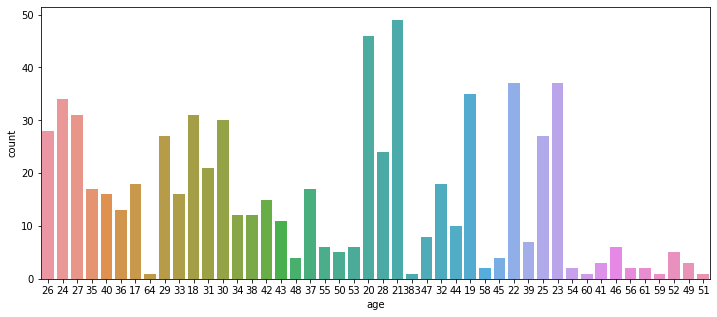

In [152]:
fig = plt.figure(figsize=(12,5))
sns.countplot(x='age', data=df);

### Gender

If the user is male, m( = 0);
If the user is female (= 1).
According to the dataset, 367 male and 337 female persons with ASD participated.

In [136]:
new_df = pd.DataFrame({'gender':df.gender.map(dict(f=1,m=0))})
df.update(new_df)

0    367
1    337
Name: gender, dtype: int64

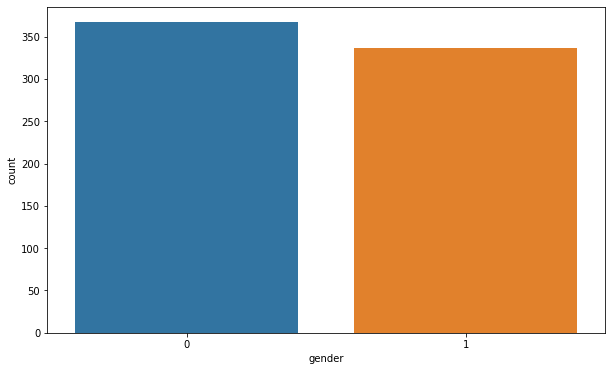

In [129]:
#male = 0, female = 1
fig = plt.figure(figsize=(10,6))
sns.countplot(x='gender', data=df);
df.gender.value_counts()

### Jaundice

If the user was born with jaundice then, yes( = 1);
If the user wasn't born with jaundice then, no (= 0).
According to the dataset, 69 individuals were born with jaundice out of 704.

In [56]:
new_df= pd.DataFrame({'jaundice':df.jaundice.map(dict(yes=1,no=0))})
df.update(new_df)

0    635
1     69
Name: jaundice, dtype: int64

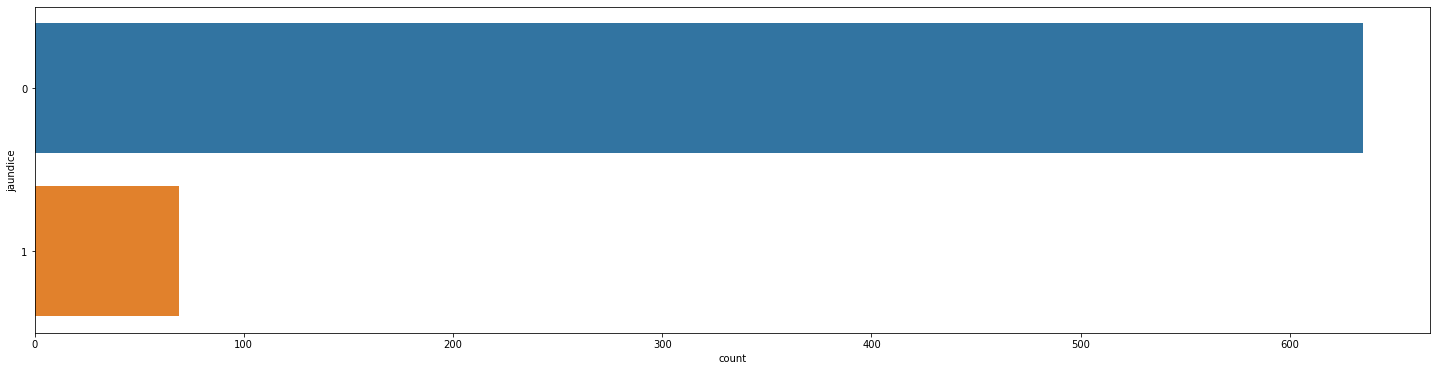

In [133]:
fig = plt.figure(figsize=(25,6))
sns.countplot(y='jaundice', data=df);
df.jaundice.value_counts()

### Autism

If the user has an immediate family member who had a Pervasive Developmental Disorder then, yes( = 1);
If the user has an immediate family member who had  Pervasive Developmental Disorder then, no( = 0);
According to the dataset, 91 individuals had a family member who had PDD out of 704.

In [61]:
new_df= pd.DataFrame({'autism':df.autism.map(dict(yes=1,no=0))})
df.update(new_df)

no     613
yes     91
Name: autism, dtype: int64

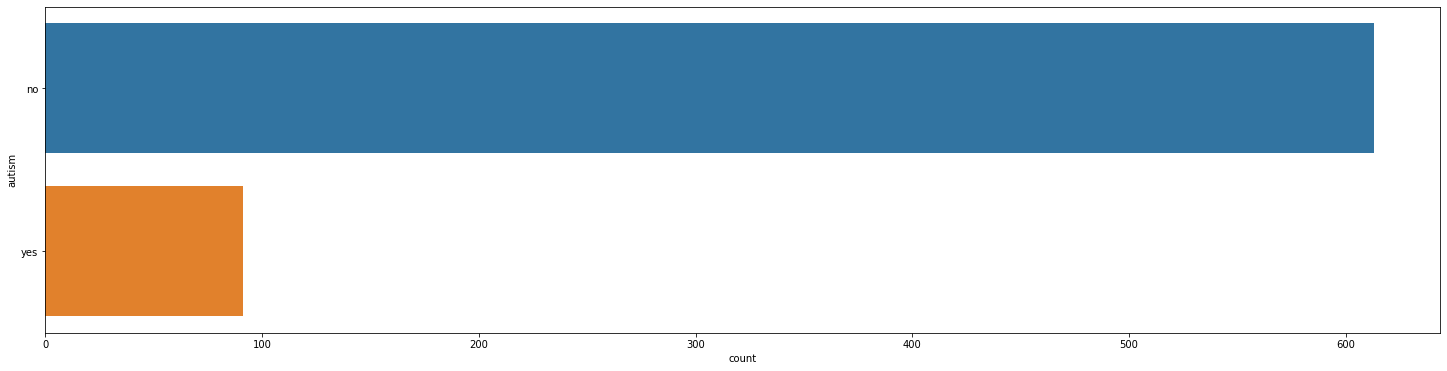

In [128]:
fig = plt.figure(figsize=(25,6))
sns.countplot(y='autism', data=df);
df.autism.value_counts()

### ASD Classification

In [116]:
new_df = pd.DataFrame({'asd_classification':df.asd_classification.map(dict(YES=1,NO=0))})
df.update(new_df)

0    515
1    189
Name: asd_classification, dtype: int64

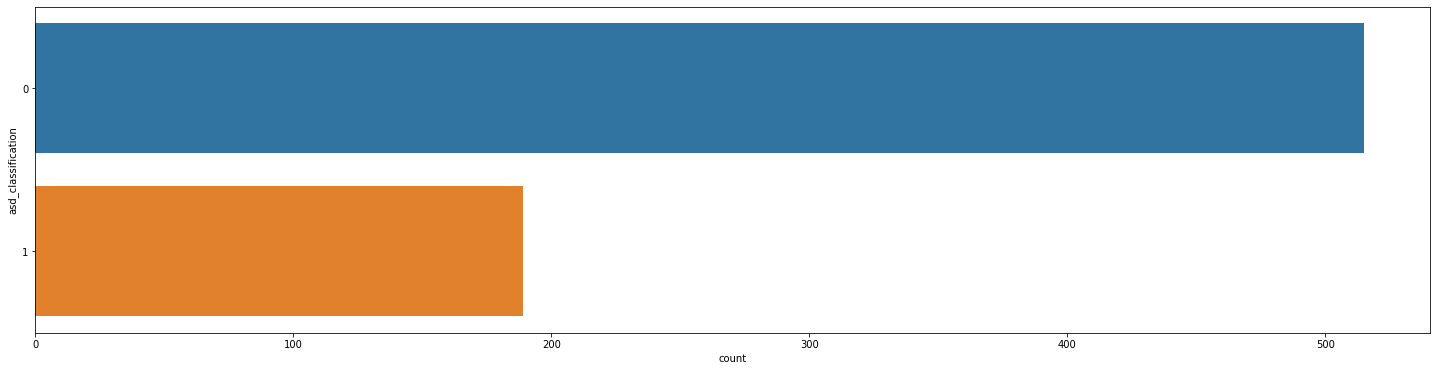

In [115]:
fig = plt.figure(figsize=(25,6))
sns.countplot(y='asd_classification', data=df);
df.asd_classification.value_counts()

### Used App Before

Whether the p/w ASD has used a screening app

In [104]:
new_df = pd.DataFrame({'used_app_before':df.used_app_before.map(dict(yes=1,no=0))})
df.update(new_df)

0    692
1     12
Name: used_app_before, dtype: int64

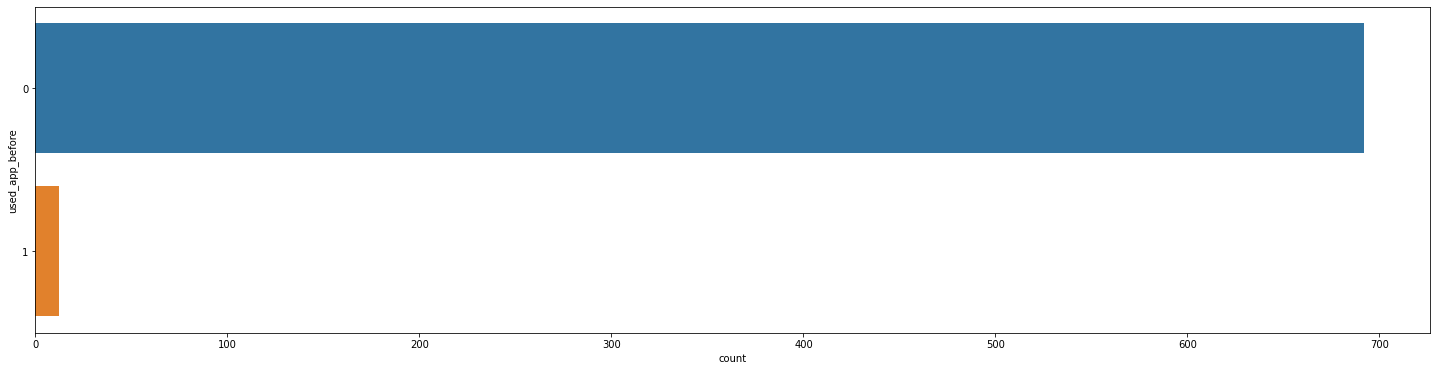

In [118]:
fig = plt.figure(figsize=(25,6))
sns.countplot(y='used_app_before', data=df);
df.used_app_before.value_counts()

In [14]:
#Check ethnicity and relation cols
df['ethnicity'].value_counts()

White-European       233
Asian                123
'Middle Eastern '     92
Black                 43
'South Asian'         36
Others                30
Latino                20
Hispanic              13
Pasifika              12
Turkish                6
others                 1
Name: ethnicity, dtype: int64

In [15]:
df['relation'].value_counts()

Self                          522
Parent                         50
Relative                       28
Others                          5
'Health care professional'      4
Name: relation, dtype: int64